In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import mglearn

In [34]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']= False      # 마이너스 깨짐방지

In [35]:
cancer = load_breast_cancer()

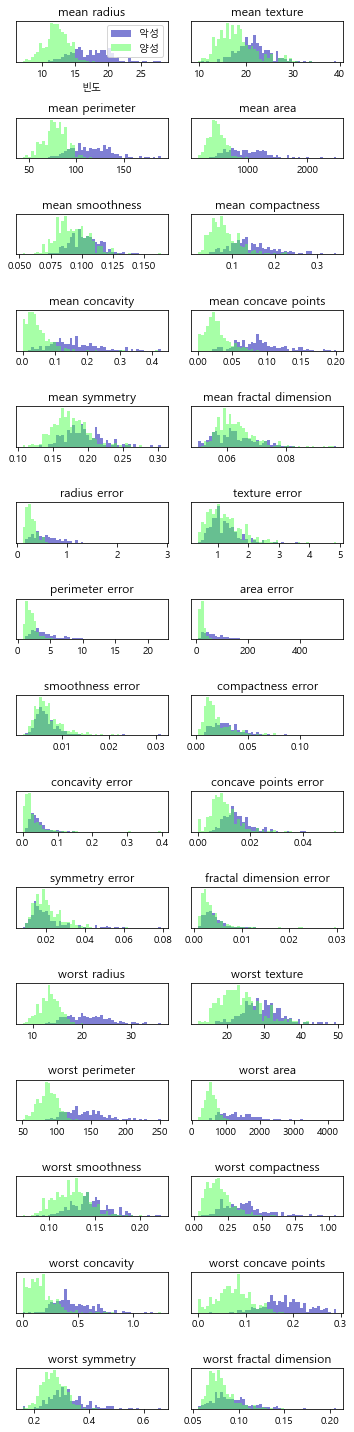

In [36]:
fig, axes = plt.subplots(15,2, figsize=(5,20))

malignant = cancer.data[cancer. target==0]
benign = cancer.data[cancer. target==1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0),alpha=0.5)
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2),alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel('특성 크기')   
ax[0].set_xlabel('빈도')   
ax[0].legend(['악성','양성'], loc='best')
fig.tight_layout()

In [37]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
scaler.fit(cancer.data)
x_scaled =scaler.transform(cancer.data)

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled)

In [39]:
print('원본 데이터 형태:', str(x_scaled.shape))
print('축소된 데이터 형태:', str(x_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


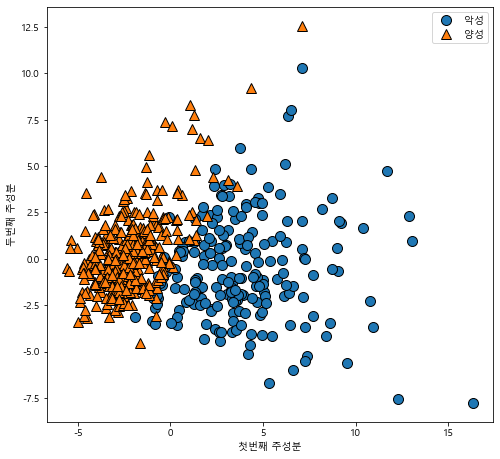

In [40]:
# 클래스의 색깔로 구분해서 두 개의 주성분 그래프 그려보기

plt.figure(figsize=(8,8))
mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1],cancer.target)
plt.legend(['악성','양성'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('첫번째 주성분')
plt.ylabel('두번째 주성분')
plt.show()